# Estimation of $\pi$ using Monte Carlo Integration

In [3]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

try:
    import distrax
except ModuleNotFoundError:
    %pip install -qq distrax
    import distrax
import ipywidgets as widget

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml
import warnings

warnings.filterwarnings("ignore")
jax.config.update("jax_platform_name", "cpu")
key = jax.random.PRNGKey(0)

In [4]:
pml.latexify(width_scale_factor=4)

the estimated pi = 3.168000
the standard pi = 3.141593
stderr = 0.091839


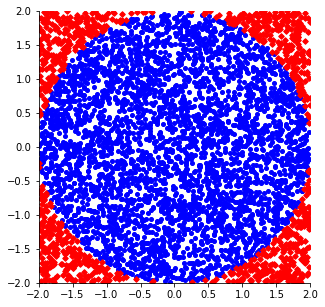

In [5]:
def estimate_pi(num_samples=5000, radius=2):
    global key
    uniform = distrax.Uniform(low=-radius, high=radius)
    x_uniform_samples = uniform.sample(seed=key, sample_shape=num_samples)
    key, subkey = jax.random.split(key)
    y_uniform_samples = uniform.sample(seed=key, sample_shape=num_samples)
    dist = x_uniform_samples**2 + y_uniform_samples**2  # distance from (0,0)

    inside = dist <= radius**2
    samples = 4 * (radius**2) * inside
    integral_estimate = jnp.mean(samples)
    pi_estimate = integral_estimate / (radius**2)
    std_err = jnp.sqrt(jnp.var(samples) / num_samples)

    print(("the estimated pi = %f" % pi_estimate))
    print(("the standard pi = %f" % jnp.pi))
    print(("stderr = %f" % std_err))

    # plot the samples
    if pml.is_latexify_enabled():
        FIG_SIZE = None
        MARKER_SIZE = 1
    else:
        FIG_SIZE = (5, 5)
        MARKER_SIZE = 4
    fig, ax = plt.subplots(figsize=FIG_SIZE)
    ax.plot(x_uniform_samples[inside], y_uniform_samples[inside], "bo", markersize=MARKER_SIZE)
    ax.plot(x_uniform_samples[~inside], y_uniform_samples[~inside], "rD", markersize=MARKER_SIZE)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_aspect("equal")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    pml.savefig("mcEstimatePi")
    plt.show()


estimate_pi()

In [6]:
widget.interact(estimate_pi, num_samples=(200, 20000, 10), radius=(0.5, 5, 0.1))

interactive(children=(IntSlider(value=5000, description='num_samples', max=20000, min=200, step=10), FloatSlid…

<function __main__.estimate_pi(num_samples=5000, radius=2)>